In [4]:
import numpy as np
import pandas as pd
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('US_StringencyIndex.csv', index_col=0, parse_dates=True)
df.index.freq = 'D'
df.head()

,Cases,Stringency Index
Date,,
2020-03-01,20,8.33
2020-03-02,14,11.11
2020-03-03,22,11.11
2020-03-04,34,11.11
2020-03-05,74,20.37


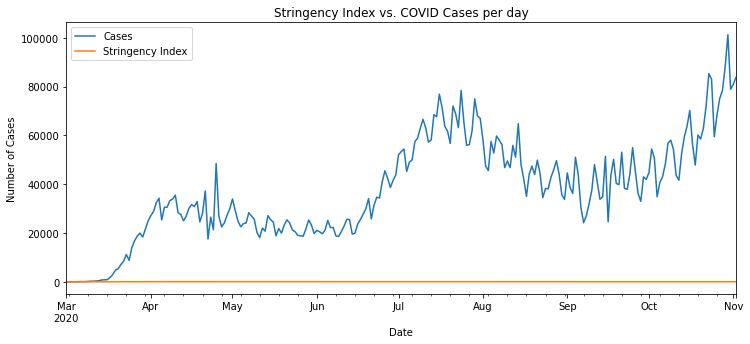

In [5]:
title = 'Stringency Index vs. COVID Cases per day'
ylabel='Number of Cases'
xlabel=''

ax = df['Cases'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
df['Stringency Index'].plot(legend=True);

In [6]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [7]:
adf_test(df['Cases'],title='Cases')

Augmented Dickey-Fuller Test: Cases
ADF test statistic       -1.238645
p-value                   0.656755
# lags used              13.000000
# observations          233.000000
critical value (1%)      -3.458731
critical value (5%)      -2.874026
critical value (10%)     -2.573424
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [8]:
adf_test(df['Stringency Index'], title='Stringency')

Augmented Dickey-Fuller Test: Stringency
ADF test statistic       -2.494535
p-value                   0.116810
# lags used              15.000000
# observations          231.000000
critical value (1%)      -3.458980
critical value (5%)      -2.874135
critical value (10%)     -2.573482
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [9]:
df_transformed = df.diff()

In [10]:
df_transformed = df_transformed.dropna()
adf_test(df_transformed['Cases'], title='CasesFirstDiff')
print()
adf_test(df_transformed['Stringency Index'], title='StringencyFirstDiff')

Augmented Dickey-Fuller Test: CasesFirstDiff
ADF test statistic       -2.772410
p-value                   0.062324
# lags used              12.000000
# observations          233.000000
critical value (1%)      -3.458731
critical value (5%)      -2.874026
critical value (10%)     -2.573424
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary

Augmented Dickey-Fuller Test: StringencyFirstDiff
ADF test statistic       -5.548410
p-value                   0.000002
# lags used              14.000000
# observations          231.000000
critical value (1%)      -3.458980
critical value (5%)      -2.874135
critical value (10%)     -2.573482
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [11]:
df_transformed = df_transformed.diff().dropna()
adf_test(df_transformed['Cases'], title='CasesSecondDiff')
print()
adf_test(df_transformed['Stringency Index'], title='StringencySecondDiff')

Augmented Dickey-Fuller Test: CasesSecondDiff
ADF test statistic     -6.486413e+00
p-value                 1.257669e-08
# lags used             1.100000e+01
# observations          2.330000e+02
critical value (1%)    -3.458731e+00
critical value (5%)    -2.874026e+00
critical value (10%)   -2.573424e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: StringencySecondDiff
ADF test statistic     -7.609039e+00
p-value                 2.281046e-11
# lags used             1.400000e+01
# observations          2.300000e+02
critical value (1%)    -3.459106e+00
critical value (5%)    -2.874190e+00
critical value (10%)   -2.573512e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [12]:
nobs=7
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

In [13]:
from statsmodels.tsa.api import VAR
for i in range(31):
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 0
AIC:  20.14356068632418
BIC:  20.17273943148108

Order = 1
AIC:  19.506052626435185
BIC:  19.593851617349998

Order = 2
AIC:  19.259707023822088
BIC:  19.40647955793334

Order = 3
AIC:  19.038528327466388
BIC:  19.244631294266465

Order = 4
AIC:  19.044183931201903
BIC:  19.309977863152497

Order = 5
AIC:  18.896237800372155
BIC:  19.222086924743166

Order = 6
AIC:  18.616352040972583
BIC:  19.00262433262484

Order = 7
AIC:  18.33183145401456
BIC:  18.778898689147262

Order = 8
AIC:  18.299969596940166
BIC:  18.80820740782446

Order = 9
AIC:  18.222955772434943
BIC:  18.792743703155736

Order = 10
AIC:  18.02741209308303
BIC:  18.65913365631148

Order = 11
AIC:  18.05898412517662
BIC:  18.75302685999664

Order = 12
AIC:  18.032461087451765
BIC:  18.789216618264216

Order = 13
AIC:  18.028400843843624
BIC:  18.848264940372683

Order = 14
AIC:  17.964129672218924
BIC:  18.847502310645677

Order = 15
AIC:  17.99346834890598
BIC:  18.94075377415498

Order = 16
AIC:  17.9267336797

In [14]:
results = model.fit(17)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 30, Nov, 2020
Time:                     16:02:15
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    18.9402
Nobs:                     221.000    HQIC:                   18.2985
Log likelihood:          -2531.13    FPE:                5.76124e+07
AIC:                      17.8639    Det(Omega_mle):     4.29359e+07
--------------------------------------------------------------------
Results for equation Cases
                          coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------
const                       89.870425       366.581101            0.245           0.806
L1.Cases                    -1.640174         0.073177          -22.414           0.000
L1.Stringency Index       -627.3

In [15]:
lag_order = results.k_ar
lag_order

17

In [16]:
z = results.forecast(y=train.values[-lag_order:], steps=7)
z

array([[ 8.25873297e+03,  1.23929786e+01],
       [-9.14502630e+03, -4.64885592e+00],
       [ 5.89391141e+03,  2.46425454e+00],
       [-1.72373688e+04, -6.96874382e-01],
       [ 1.26736358e+03, -6.80858396e-01],
       [-1.79475735e+04,  1.57706562e+00],
       [ 2.54340482e+04,  1.17811561e+00]])

In [17]:
test

,Cases,Stringency Index
Date,,
2020-10-27,-2149.0,14.81
2020-10-28,-3528.0,0.00
2020-10-29,6517.0,0.00
2020-10-30,3384.0,0.00
2020-10-31,-35482.0,0.00
2020-11-01,24406.0,0.00
2020-11-02,815.0,0.00


In [18]:
idx = pd.date_range('27/10/2020', periods=7, freq='D')
df_forecast = pd.DataFrame(z, index=idx, columns=['Cases2d','Stringency2d'])
df_forecast

,Cases2d,Stringency2d
2020-10-27,8258.732972,12.392979
2020-10-28,-9145.026301,-4.648856
2020-10-29,5893.911406,2.464255
2020-10-30,-17237.368750,-0.696874
2020-10-31,1267.363577,-0.680858
2020-11-01,-17947.573506,1.577066
2020-11-02,25434.048227,1.178116


In [19]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Cases1d'] = (df['Cases'].iloc[-nobs-1]-df['Cases'].iloc[-nobs-2]) + df_forecast['Cases2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['CasesForecast'] = df['Cases'].iloc[-nobs-1] + df_forecast['Cases1d'].cumsum()

In [20]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Stringency1d'] = (df['Stringency Index'].iloc[-nobs-1]-df['Stringency Index'].iloc[-nobs-2]) + df_forecast['Stringency2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['StringencyForecast'] = df['Stringency Index'].iloc[-nobs-1] + df_forecast['Stringency1d'].cumsum()

In [21]:
df_forecast

,Cases2d,Stringency2d,Cases1d,CasesForecast,Stringency1d,StringencyForecast
2020-10-27,8258.732972,12.392979,17177.732972,85536.732972,-2.417021,48.972979
2020-10-28,-9145.026301,-4.648856,8032.706671,93569.439643,-7.065877,41.907101
2020-10-29,5893.911406,2.464255,13926.618077,107496.057719,-4.601623,37.305478
2020-10-30,-17237.368750,-0.696874,-3310.750673,104185.307046,-5.298497,32.006981
2020-10-31,1267.363577,-0.680858,-2043.387096,102141.919950,-5.979356,26.027626
2020-11-01,-17947.573506,1.577066,-19990.960602,82150.959348,-4.402290,21.625336
2020-11-02,25434.048227,1.178116,5443.087625,87594.046974,-3.224174,18.401161


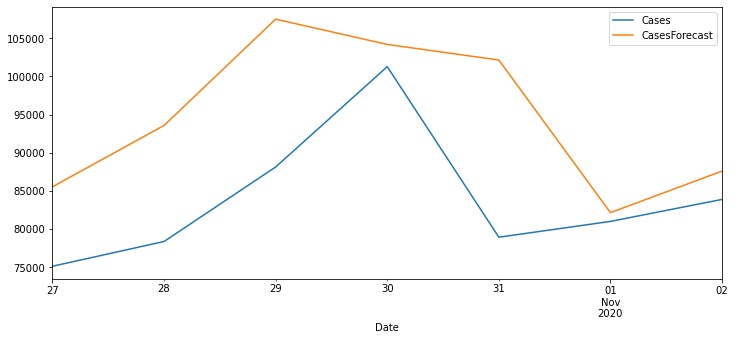

In [22]:
df['Cases'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['CasesForecast'].plot(legend=True);